# Подготовка и первичный анализ данных

## Импорт библиотек и настройка окружения

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

import warnings
warnings.filterwarnings('ignore')

## Загрузка данных

In [3]:
path2file = '../datasets/train.csv'
black_friday_df = pd.read_csv(path2file)

In [4]:
black_friday_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Первичный анализ

In [5]:
black_friday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
print(f'Уникальных пользователей: {len(black_friday_df.User_ID.unique())}')

Уникальных пользователей: 5891


In [7]:
print(f'Уникальных товаров: {len(black_friday_df.Product_ID.unique())}')

Уникальных товаров: 3631


In [10]:
print(f'Уникальных профессий: {len(black_friday_df.Occupation.unique())}')
print(sorted(black_friday_df.Occupation.unique()))

Уникальных профессий: 21
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [18]:
print(f'Возрастные группы: {sorted(black_friday_df.Age.unique())}')

Возрастные группы: ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']


In [22]:
print(f'Женат/замужем: {black_friday_df.Marital_Status.unique()}')
print(f'Пол: {black_friday_df.Gender.unique()}')
print(f'Категория города: {sorted(black_friday_df.City_Category.unique())}')
print(f'Количество лет в городе: {sorted(black_friday_df.Stay_In_Current_City_Years.unique())}')

Женат/замужем: [0 1]
Пол: ['F' 'M']
Категория города: ['A', 'B', 'C']
Количество лет в городе: ['0', '1', '2', '3', '4+']


### Признаки категории товара

Каждый товар может относиться минимум к одной категории, но может относиться и к двум, и к трём категориям товаров

Если товар относится к какой-то категории, то в других столбцах категорий не может стоять номер этой же категории

Если товар относится только к одной категории, в остальных столбцах категорий будет значение nan 

In [23]:
print(f'Всего категорий: {len(black_friday_df.Product_Category_1.unique())}')

Всего категорий: 20


In [26]:
print(f'Первая категория: {sorted(black_friday_df.Product_Category_1.unique())}')

Первая категория: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [27]:
print(f'Вторая категория: {sorted(black_friday_df.Product_Category_2.unique())}')

Вторая категория: [nan, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]


In [28]:
print(f'Третья категория: {sorted(black_friday_df.Product_Category_3.unique())}')

Третья категория: [nan, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]


## Визуализация

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

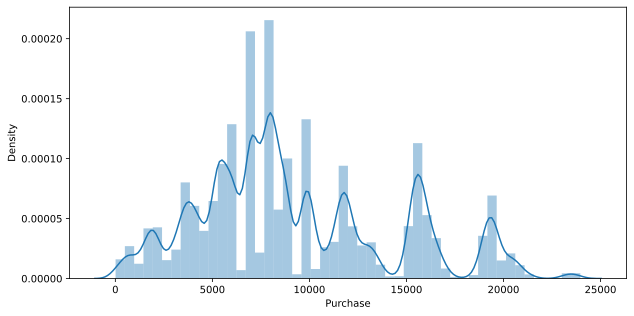

In [137]:
sns.distplot(black_friday_df.Purchase)

<AxesSubplot:xlabel='Purchase'>

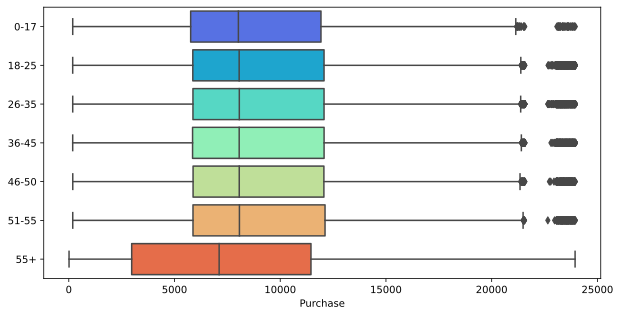

In [138]:
sns.boxplot(x=black_friday_df.Purchase, y=sorted(black_friday_df.Age), palette='rainbow')

<AxesSubplot:ylabel='Purchase'>

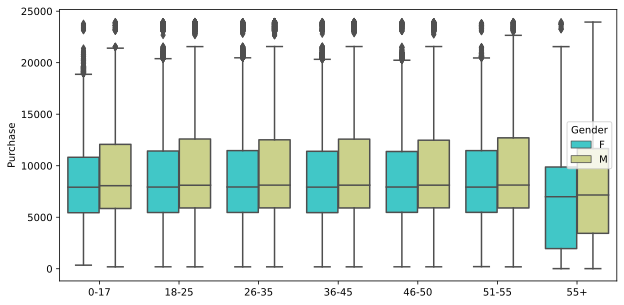

In [139]:
sns.boxplot(x=sorted(black_friday_df.Age), 
            y=black_friday_df.Purchase, 
            hue=black_friday_df.Gender, 
            palette='rainbow',
            orient='v')

<AxesSubplot:xlabel='Purchase'>

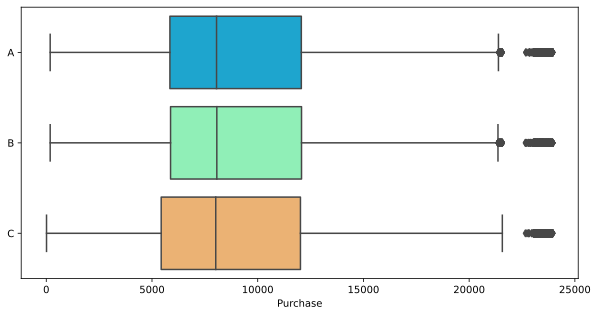

In [141]:
sns.boxplot(x=black_friday_df.Purchase, y=sorted(black_friday_df.City_Category), palette='rainbow')

<AxesSubplot:xlabel='Purchase'>

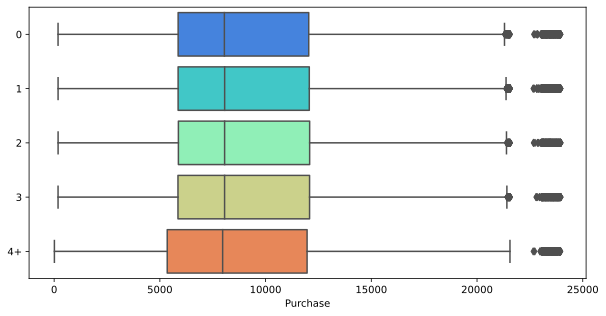

In [142]:
sns.boxplot(x=black_friday_df.Purchase, y=sorted(black_friday_df.Stay_In_Current_City_Years), palette='rainbow')

## Выводы

Исходя из информации о категориях товаров, можно убрать из датасета столбцы со второй и третьей категорией товара

Исходя из полученных графиков, можно сделать вывод:
1. Возрастные категории от 0 до 55 можно объединить в одну
2. Города А и В можно объединить в одну категорию городов
3. Людей, которые живут в текущем городе менее 4 лет, можно объединить в одну категорию